In [1]:
from Utils.Solver import *
from Utils.Signals import *

In [2]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.5, 0.5, 0.25, 1.75])  # Example signal scores
start_date ='2021-01-15'
end_date ='2022-01-15'

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## Signals 

In [3]:
import yfinance as yf
import talib as ta
import pandas as pd
import numpy as np

# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  5 of 5 completed


### RSI SIGNAL

In [4]:
# Calculate the RSI signal scores
rsi_signal_scores = calculate_rsi_signal(data, tickers, date='2022-12-23', period=14)
rsi_scores = [score[1] for score in rsi_signal_scores]
rsi_scores_array = np.array(rsi_scores)
print(rsi_scores_array)

[35.69466361 44.14053193 19.81992342 38.02756082 40.44852389]


     pcost       dcost       gap    pres   dres
 0: -1.2478e-01 -1.1479e+00  1e+00  0e+00  3e+00
 1: -1.2557e-01 -1.5230e-01  3e-02  1e-16  7e-02
 2: -1.2688e-01 -1.2801e-01  1e-03  1e-16  1e-03
 3: -1.2692e-01 -1.2694e-01  2e-05  8e-17  1e-05
 4: -1.2692e-01 -1.2692e-01  2e-07  9e-17  1e-07
 5: -1.2692e-01 -1.2692e-01  2e-09  2e-16  1e-09
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.20048013855992355), 'MSFT': np.float64(0.2597473254984795), 'TSLA': np.float64(0.0890823596760872), 'AMZN': np.float64(0.21685077672988462), 'GOOG': np.float64(0.23383939953562521)}
Final Portfolio Weights: [0.20048014 0.25974733 0.08908236 0.21685078 0.2338394 ]


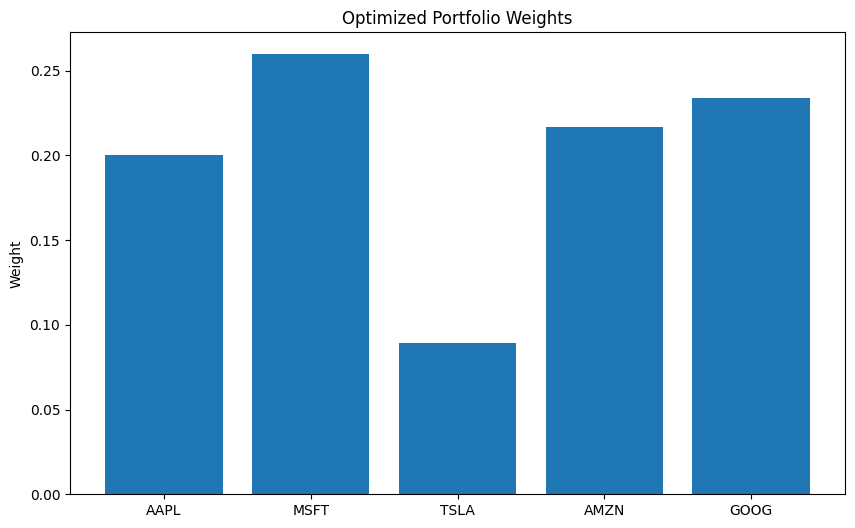

In [5]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
rsi_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, rsi_scores_array)
print("Final Portfolio Weights:", rsi_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=rsi_portfolio_weights)

Total Portfolio Return: 147.66%
Annualized Portfolio Return: 147.66%


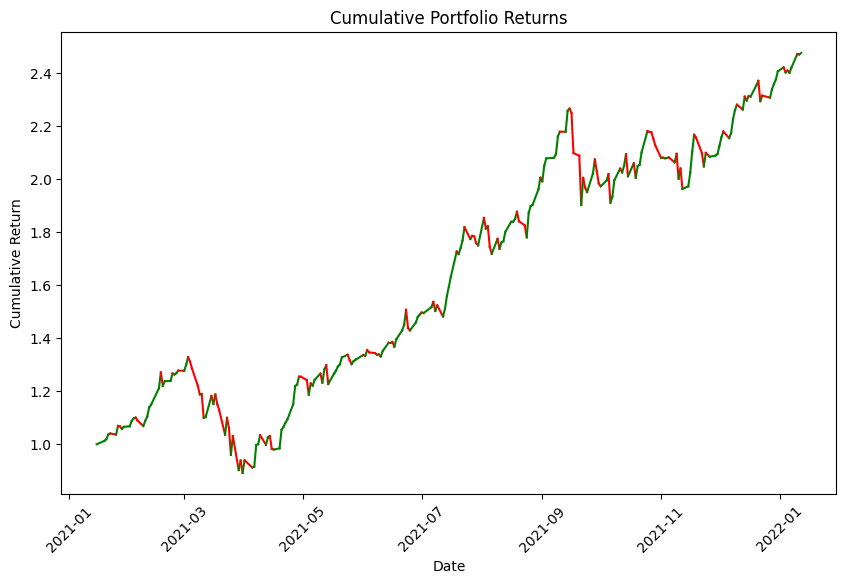

In [6]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, rsi_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

### MACD signal

In [7]:
# Calculate MACD for a specific date (e.g., '2021-01-15')
macd_signal = calculate_macd_signal(data, tickers, '2021-01-15')
macd_scores = [score[1] for score in macd_signal]
macd_scores_array = np.array(macd_scores)

     pcost       dcost       gap    pres   dres
 0: -5.1576e+00 -3.2420e+00  2e+01  5e+00  1e+00
 1: -9.9484e-01 -1.9725e+00  1e+00  9e-03  2e-03
 2: -1.0944e+00 -1.1813e+00  9e-02  7e-04  2e-04
 3: -1.1233e+00 -1.1306e+00  7e-03  2e-05  4e-06
 4: -1.1260e+00 -1.1268e+00  8e-04  1e-16  1e-16
 5: -1.1262e+00 -1.1262e+00  7e-05  2e-16  4e-16
 6: -1.1262e+00 -1.1262e+00  9e-07  2e-16  3e-16
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.33481492627206655), 'MSFT': np.float64(0.6384772861950085), 'TSLA': np.float64(3.039786636239293e-09), 'AMZN': np.float64(0.02670776919649398), 'GOOG': np.float64(1.529664420253827e-08)}
Final Portfolio Weights: [3.34814926e-01 6.38477286e-01 3.03978664e-09 2.67077692e-02
 1.52966442e-08]


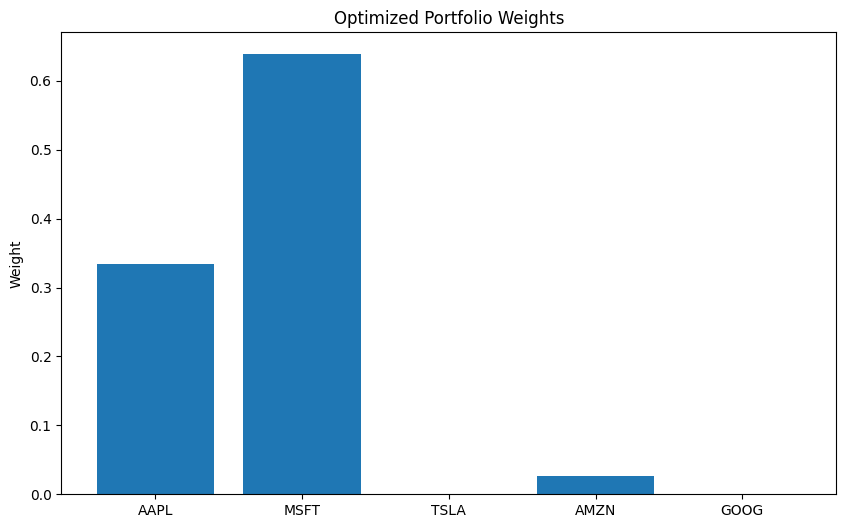

In [8]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
macd_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, macd_scores_array)
print("Final Portfolio Weights:", macd_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=macd_portfolio_weights)

Total Portfolio Return: 76.57%
Annualized Portfolio Return: 76.57%


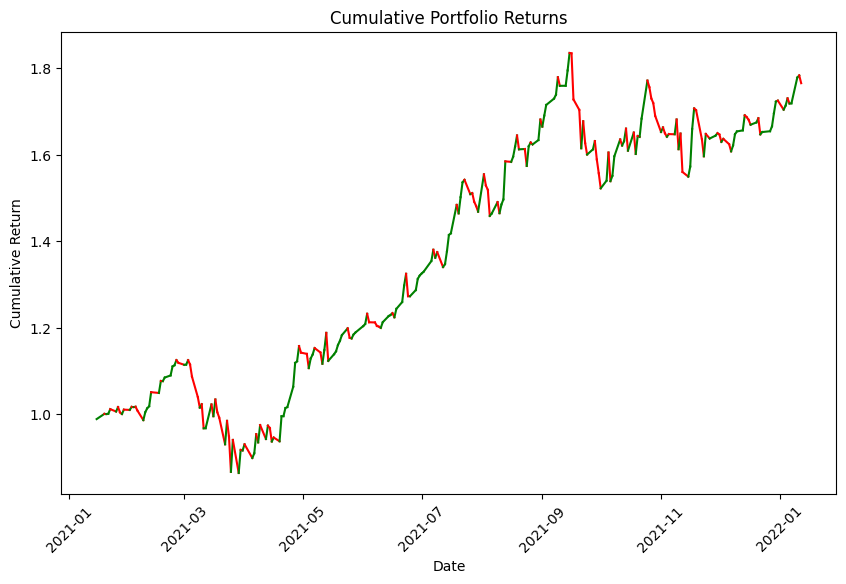

In [9]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, macd_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)

### SMA signal

In [10]:
# Calculate SMA crossover signal for a specific date (e.g., '2021-01-15')
sma_signal = calculate_sma_signal(data, tickers, '2021-01-15')
sma_scores = [score[1] for score in sma_signal]
sma_scores_array = np.array(sma_scores)
print(sma_scores_array)

[19.99331276 13.46059677 81.52420954 11.69167049 11.39482956]


     pcost       dcost       gap    pres   dres
 0: -2.0345e-01 -1.3608e+00  1e+00  2e-16  3e+00
 1: -2.2219e-01 -3.2681e-01  1e-01  8e-17  3e-01
 2: -2.3998e-01 -2.5115e-01  1e-02  2e-16  4e-17
 3: -2.4069e-01 -2.4133e-01  6e-04  1e-16  3e-17
 4: -2.4070e-01 -2.4071e-01  8e-06  1e-16  2e-17
 5: -2.4070e-01 -2.4070e-01  8e-08  4e-17  4e-17
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.13101376435097803), 'MSFT': np.float64(0.07186851516994525), 'TSLA': np.float64(0.6880979728194783), 'AMZN': np.float64(0.055853547079744846), 'GOOG': np.float64(0.05316620057985358)}
Final Portfolio Weights: [0.13101376 0.07186852 0.68809797 0.05585355 0.0531662 ]


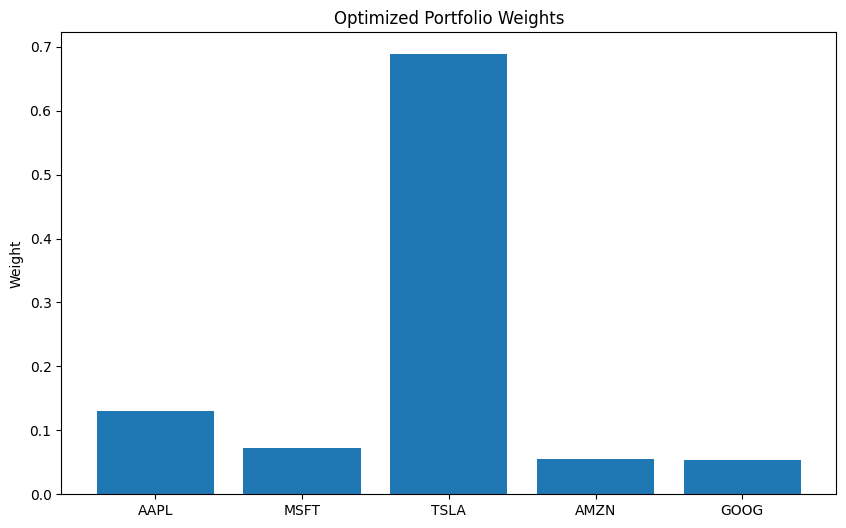

In [11]:
portfolio_solver = Portfolio_Solver(0.8, max_weight_threshold=0.3)
sma_portfolio_weights = portfolio_solver.SolveSignalPortfolio(tickers, data, sma_scores_array)
print("Final Portfolio Weights:", sma_portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=sma_portfolio_weights)

Total Portfolio Return: 54.65%
Annualized Portfolio Return: 54.65%


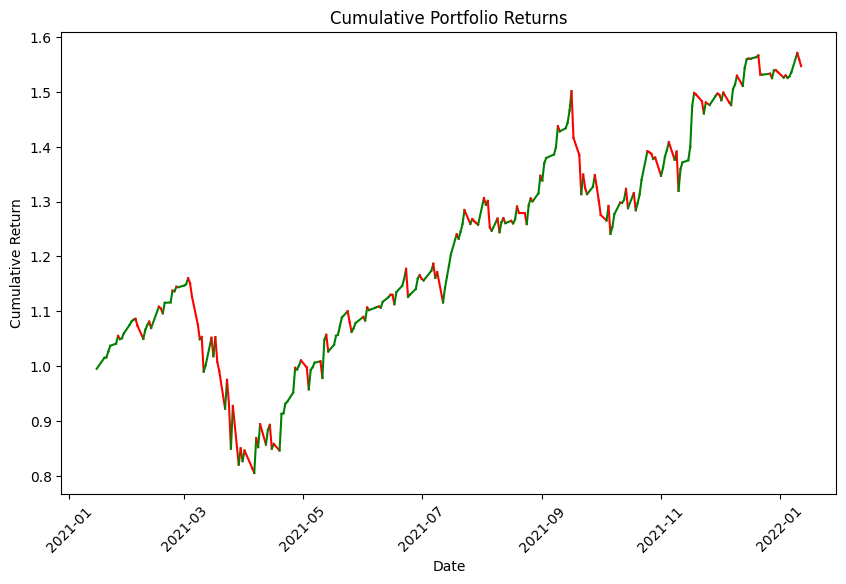

In [12]:
# Calculate portfolio returns and performance
cumulative_returns, total_return, annualized_return = portfolio_solver.CalculatePortfolioReturns(tickers, data, sma_portfolio_weights)
# Show the portfolio performance plot
portfolio_solver.ShowPortfolioPerformance(cumulative_returns, data, start_date, end_date)